<a href="https://colab.research.google.com/github/Arisarayangyoo/Python_dataviz2024/blob/main/final_dataviz_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# นางสาวอริสรา ยังอยู่ 653020606-3

#**ข้อสอบ หลักๆ อยากรู้ว่าอยู่กลุ่มไหน**
0. preprocess ข้อมูลตามคำแนะนำข้างบน
1. ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้
2. visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น
3. ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี
4. สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

## **0.preprocess ข้อมูลตามคำแนะนำข้างบน**

โหลดข้อมูล Metabolites จำนวน 51 samples จาก https://drive.google.com/drive/folders/18BGc4-dxHwuSB6ep3PmHa688Fiww23CI?usp=sharing
ซี่งประกอบด้วยค่า X ขนาด 51x65536 ซึ่งเป็นค่าความเข้มข้นขององค์ประกอบ และ ppm ขนาด 65536 ซึ่งเป็นค่า Chemical shift
ดังรูป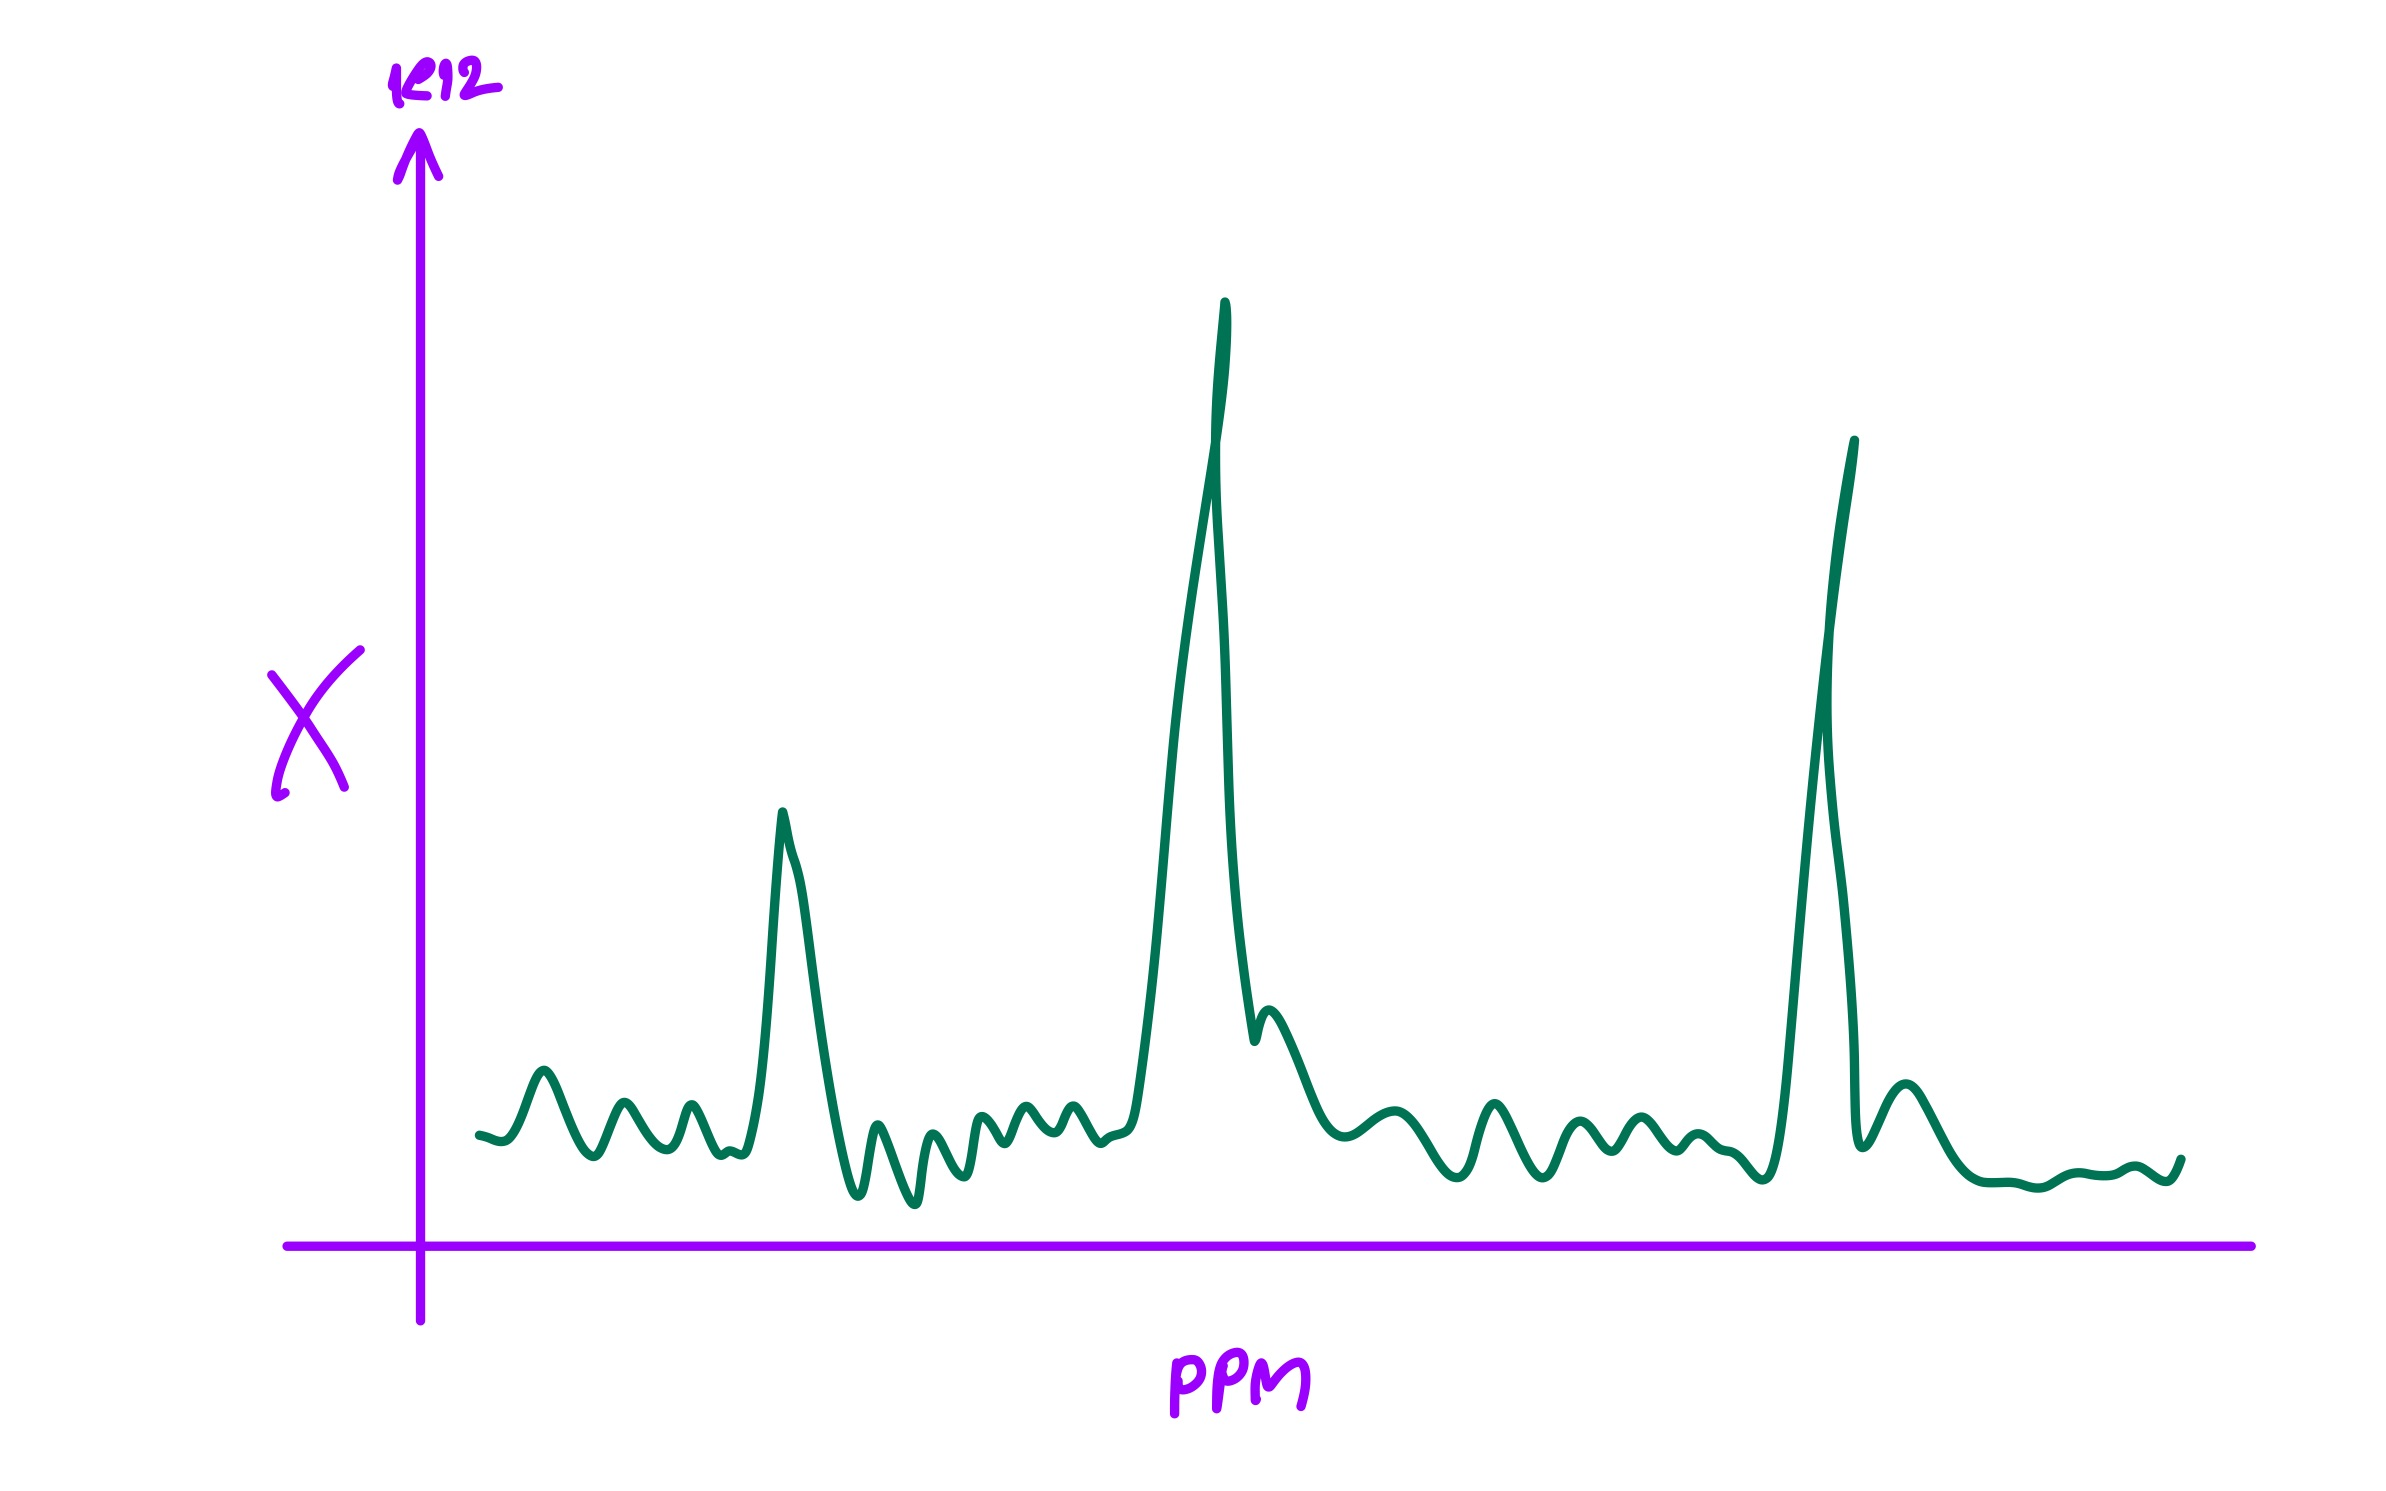

In [158]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Data/Xnn_ppm.pickle'
Xnn_ppm = pd.read_pickle(path)
print(Xnn_ppm)

Mounted at /content/drive
(array([[ 1.36984969e+07,  1.36904279e+07,  1.27889682e+07, ...,
         1.88668440e+06,  3.11779437e+06,  3.34950400e+06],
       [ 8.55679993e+06,  7.90758455e+06,  7.28975667e+06, ...,
         1.36576000e+06,  1.36576000e+06,  1.36576000e+06],
       [ 4.74035200e+06,  4.74035200e+06,  4.74035200e+06, ...,
        -2.02200274e+06, -2.32252840e+06, -3.07843664e+06],
       ...,
       [ 3.86329400e+07,  3.86329400e+07,  3.86329400e+07, ...,
        -4.37613458e+08, -4.38095321e+08, -4.40187284e+08],
       [ 9.94168277e+05,  9.94168277e+05,  9.94168277e+05, ...,
        -4.62360904e+05,  4.27633911e+05, -1.72847014e+06],
       [-1.41491086e+05, -1.41491086e+05, -1.41491086e+05, ...,
         1.16130230e+07,  1.16073431e+07,  8.35909427e+06]]), array([10.87128   , 10.87109488, 10.87090976, ..., -1.26026981,
       -1.26045493, -1.26064005]))


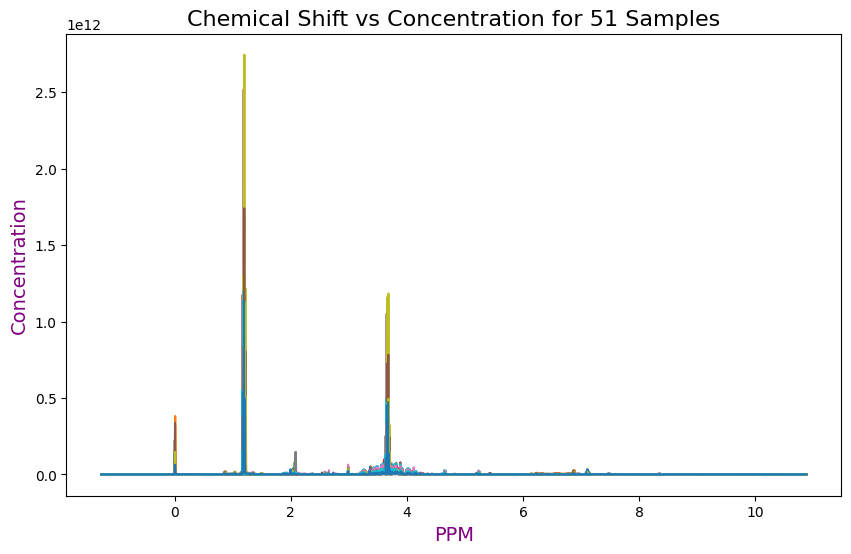

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ดึงข้อมูลจาก tuple
X = Xnn_ppm[0]  # 2D array: 51x65536 (ค่าความเข้มข้นขององค์ประกอบ)
ppm = Xnn_ppm[1]  # 1D array: 65536 (ค่า Chemical shift)

# ตรวจสอบขนาดของข้อมูลก่อน plot
if X.shape[1] == len(ppm):
    plt.figure(figsize=(10, 6))  # ขนาดของกราฟ

    # Plot ข้อมูลทั้งหมดจาก 51 แถวใน X
    for i in range(X.shape[0]):  # X.shape[0] = 51
        plt.plot(ppm, X[i], label=f"Sample {i+1}")

    # ปรับแต่งกราฟ
    plt.title("Chemical Shift vs Concentration for 51 Samples", fontsize=16)
    plt.xlabel("PPM", fontsize=14, color='purple')  # แกน X
    plt.ylabel("Concentration", fontsize=14, color='purple')  # แกน Y

    # แสดงกราฟ
    plt.show()

else:
    print("Error: The number of columns in X must match the length of ppm.")


จัดการข้อมูลโดย 1 ตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm $\leq$ 0 และ ppm $\geq$ 9.5)
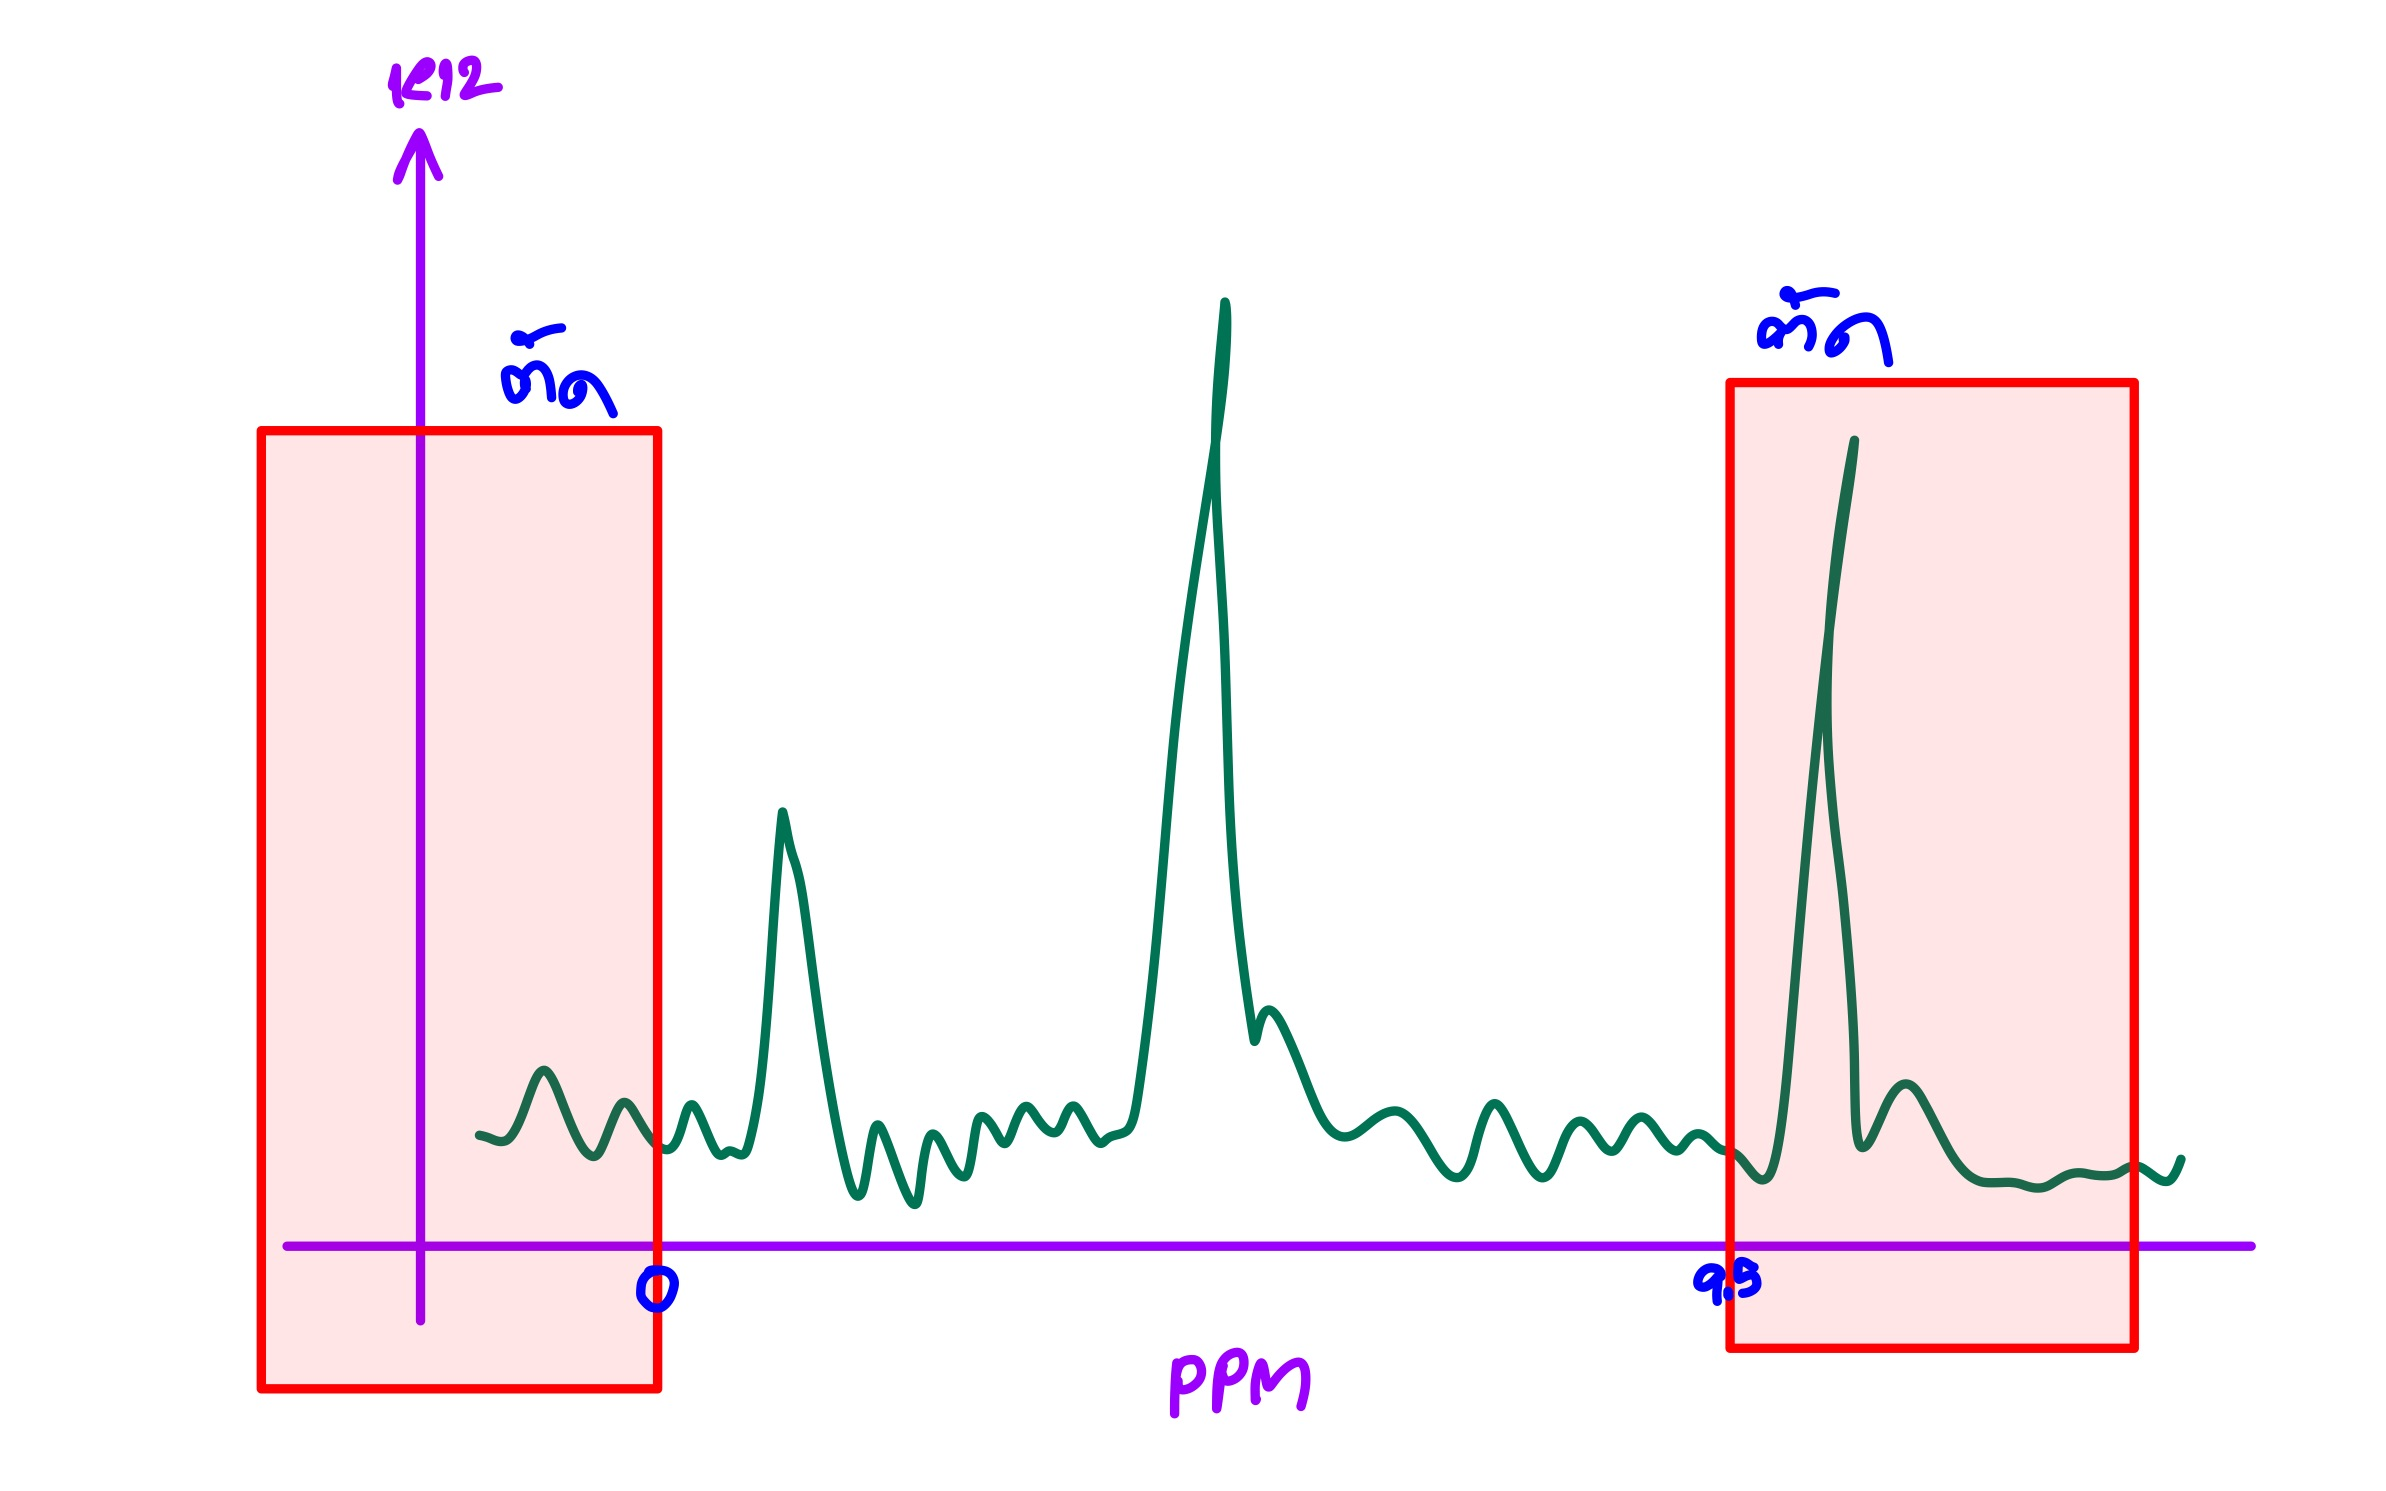

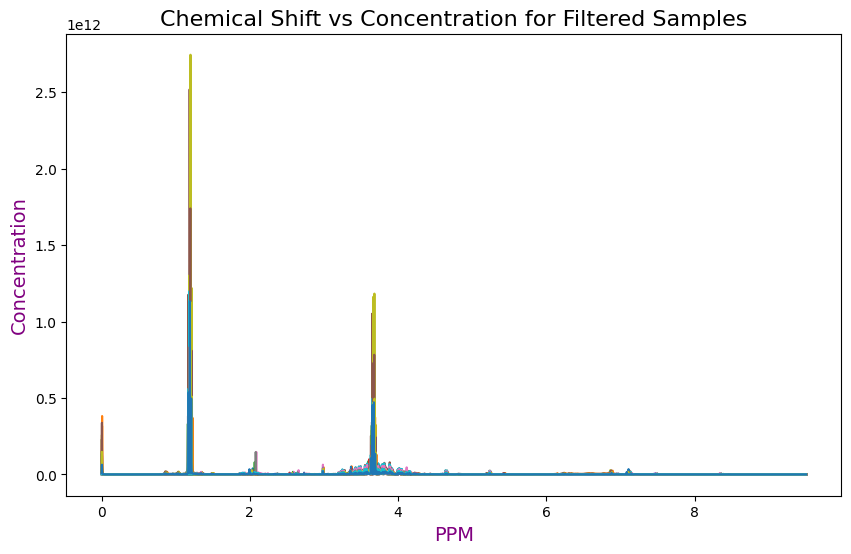

In [160]:
# สร้าง mask เพื่อกรองค่า ppm
mask = (ppm > 0) & (ppm < 9.5)

# ตัดข้อมูล X และ ppm ตามเงื่อนไขที่กำหนด
X_filtered = X[:, mask]  # กรอง X โดยใช้ mask
ppm_filtered = ppm[mask]  # กรอง ppm โดยใช้ mask

# ตรวจสอบขนาดของข้อมูลก่อน plot
if X_filtered.shape[1] == len(ppm_filtered):
    plt.figure(figsize=(10, 6))  # ขนาดของกราฟ

    # Plot ข้อมูลทั้งหมดจาก 51 แถวใน X ที่ถูกกรองแล้ว
    for i in range(X_filtered.shape[0]):  # X_filtered.shape[0] = 51
        plt.plot(ppm_filtered, X_filtered[i], label=f"Sample {i+1}")

    # ปรับแต่งกราฟ
    plt.title("Chemical Shift vs Concentration for Filtered Samples", fontsize=16)
    plt.xlabel("PPM", fontsize=14, color='purple')  # แกน X
    plt.ylabel("Concentration", fontsize=14, color='purple')  # แกน Y

    plt.show()

else:
    print("Error: The number of columns in X must match the length of ppm.")



และ 2 quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X
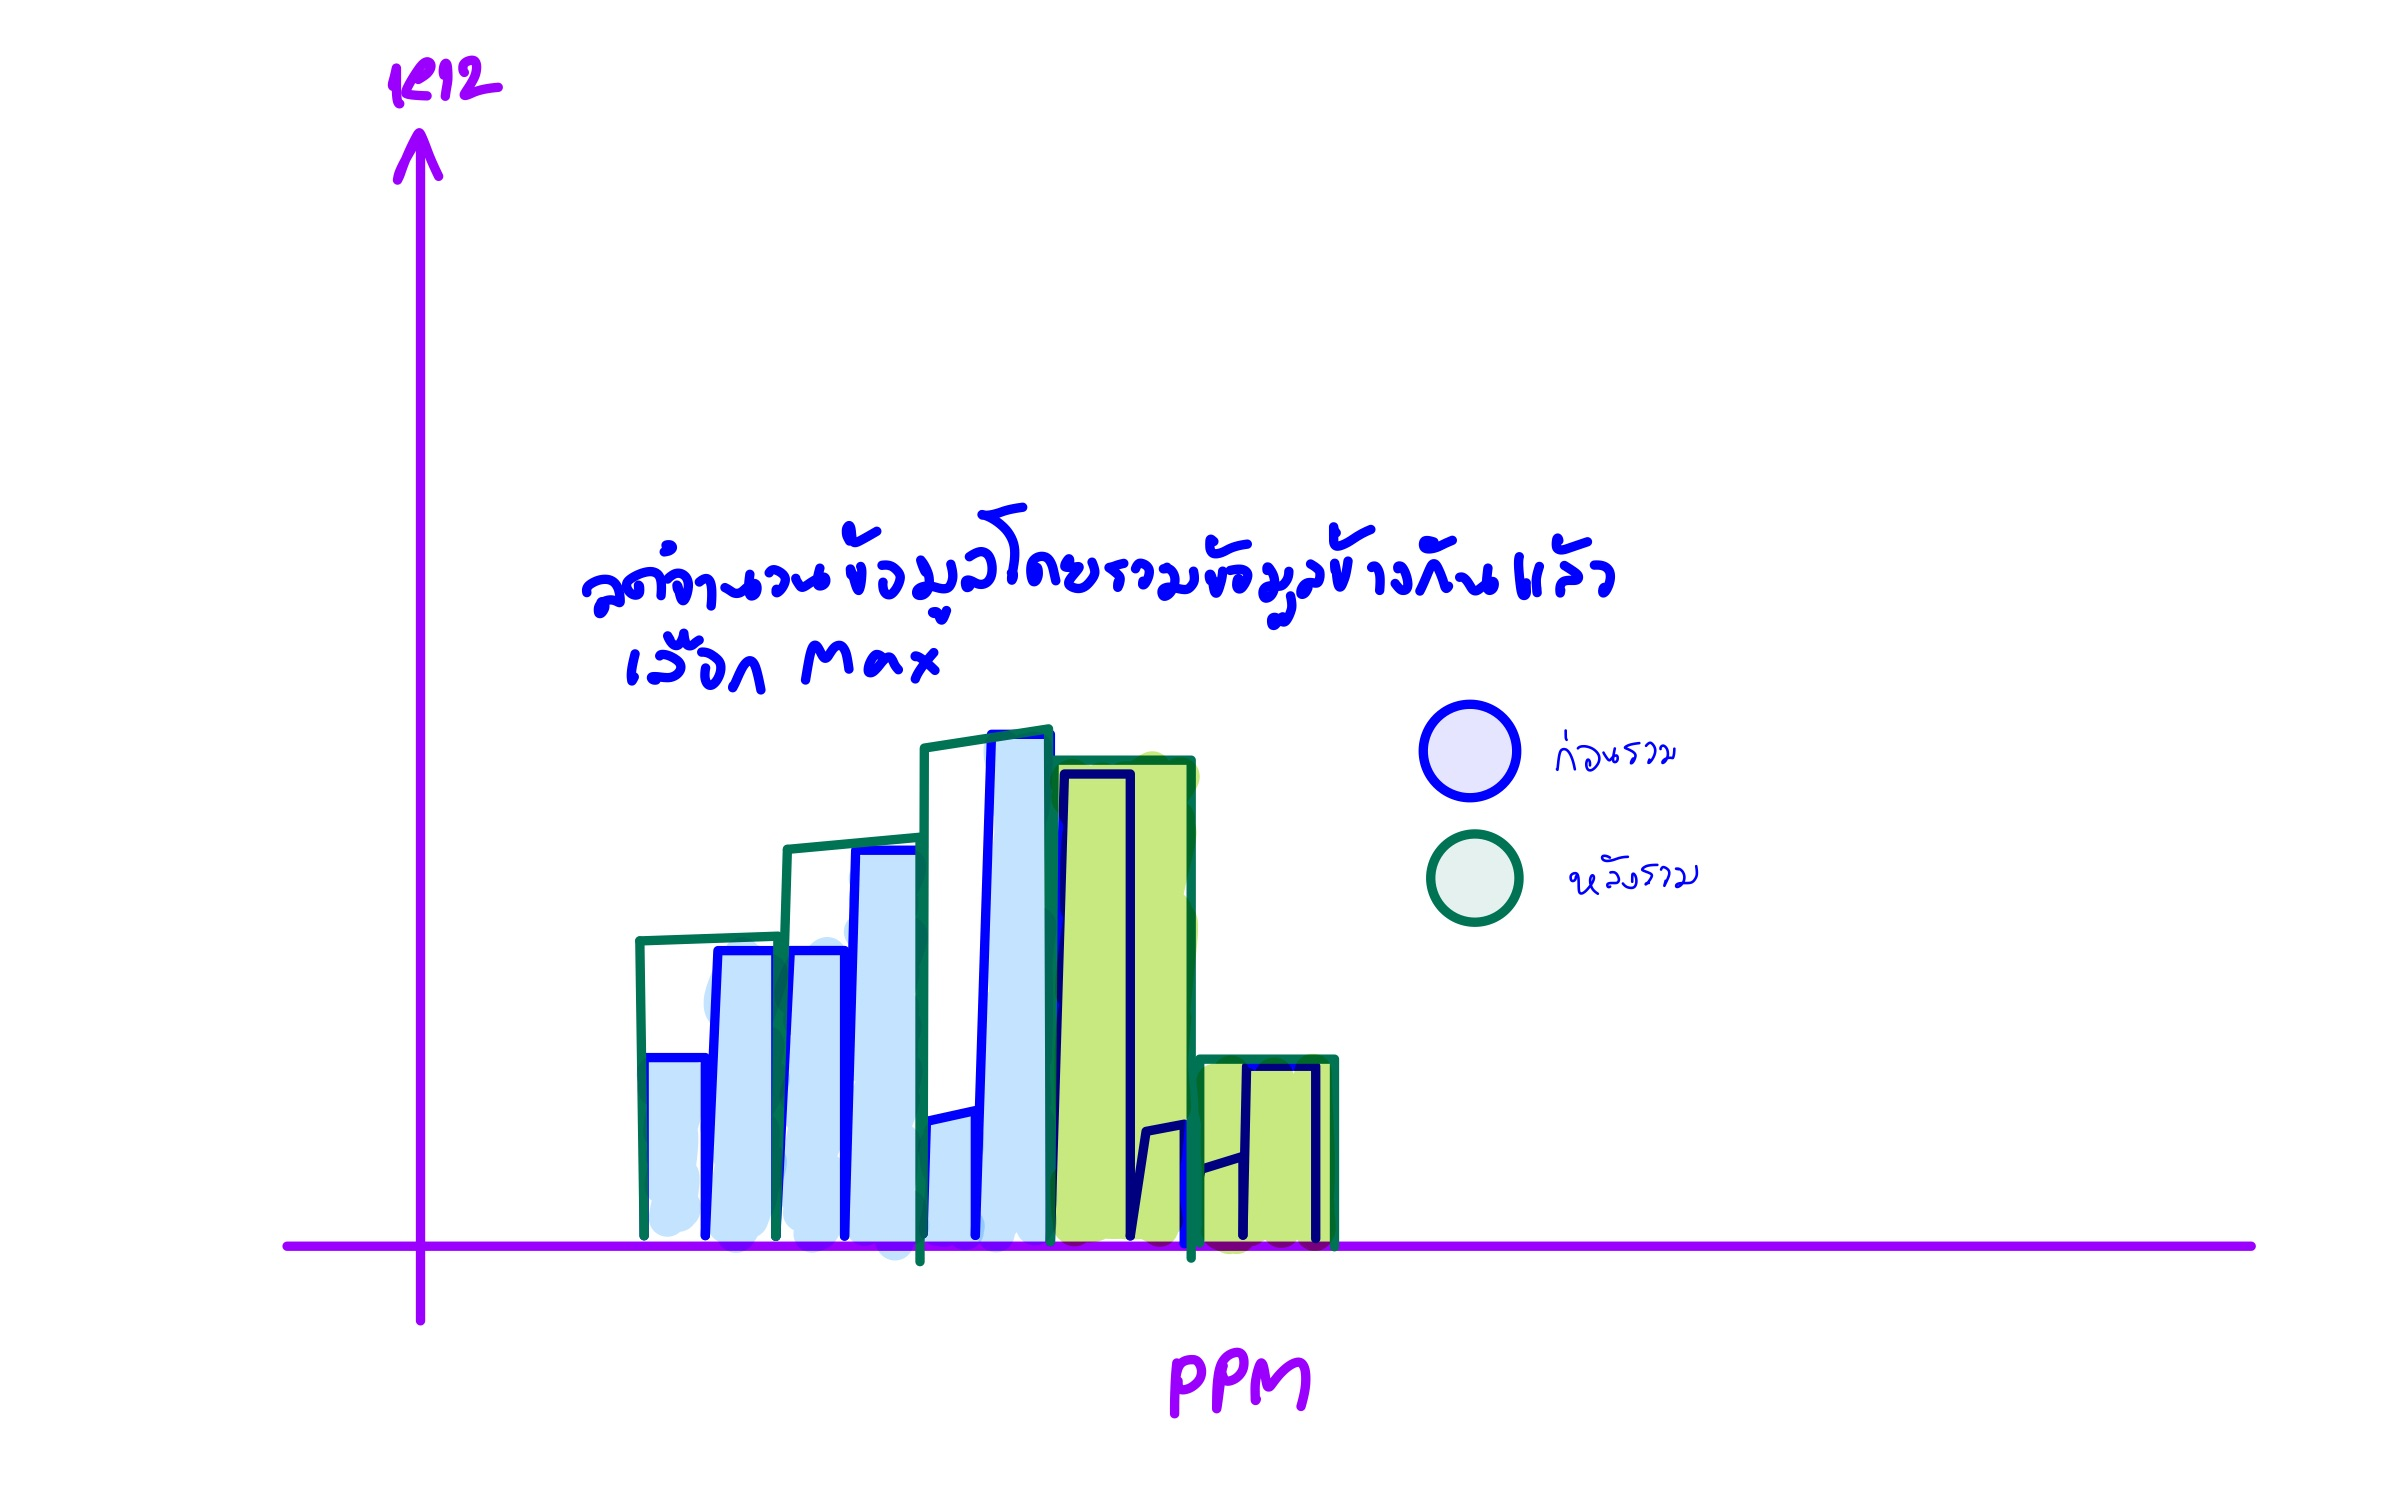

In [161]:
import numpy as np

# Simulate sample data (Replace with your actual data)
np.random.seed(42)  # For reproducibility
X = np.random.rand(51, 2000)  # Original data: 51 samples, 2000 features

# Function to quantize data by selecting the max from adjacent groups
def quantize_data(X, target_cols=400):
    group_size = X.shape[1] // target_cols  # Calculate group size (2000 / 400 = 5)

    # Reshape and take max along the grouped axis
    X_quantized = X.reshape(X.shape[0], target_cols, group_size).max(axis=2)
    return X_quantized

# Perform quantization
X_quantized = quantize_data(X)

# Verify the new shape
print(f"Original Shape: {X.shape}")
print(f"Quantized Shape: {X_quantized.shape}")

Original Shape: (51, 2000)
Quantized Shape: (51, 400)


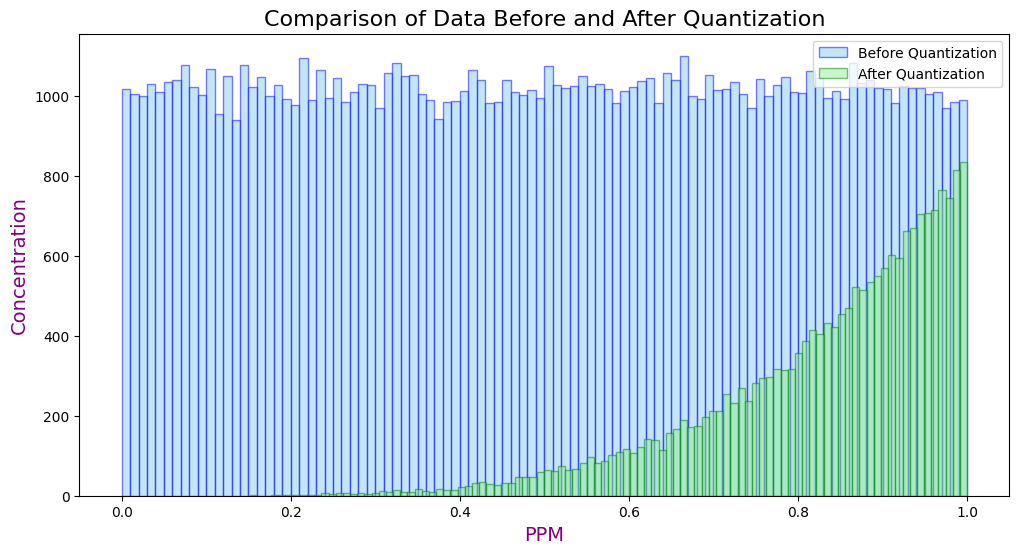

In [162]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data (replace with your actual data if available)
np.random.seed(42)  # For reproducibility
X = np.random.rand(51, 2000)  # Example data of shape 51 x 2000

# Quantize the data to 51 x 400 by grouping adjacent columns and taking the max value
X_quantized = X.reshape(51, 400, 5).max(axis=2)

# Flatten both datasets for histogram comparison
original_flat = X.flatten()
quantized_flat = X_quantized.flatten()

# Plot histogram comparison
fig, ax = plt.subplots(figsize=(12, 6))

# Histogram for original data (X)
ax.hist(original_flat, bins=100, alpha=0.5, label='Before Quantization', color='skyblue', edgecolor='blue')

# Histogram for quantized data (X_quantized)
ax.hist(quantized_flat, bins=100, alpha=0.5, label='After Quantization', color='lightgreen', edgecolor='green')

# Set labels and title
ax.set_xlabel('PPM', fontsize=14, color='purple')
ax.set_ylabel('Concentration', fontsize=14, color='purple')  # Changed Y-axis label to Concentration
ax.set_title('Comparison of Data Before and After Quantization', fontsize=16)
ax.legend()

# Show the plot
plt.show()


## **1.ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้**

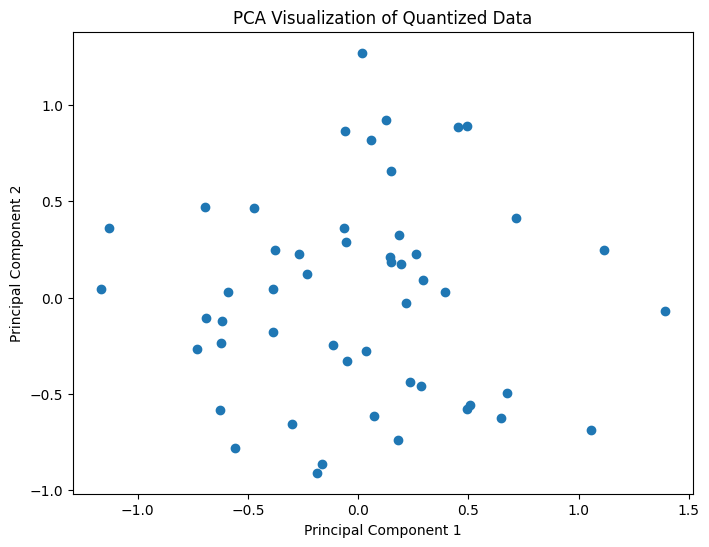

Explained variance ratio: [0.03583336 0.03479136]


In [163]:
# prompt: ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_quantized)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Quantized Data')
plt.show()

# Print explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

## **2-3**
*   2.visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น
*   3.ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี

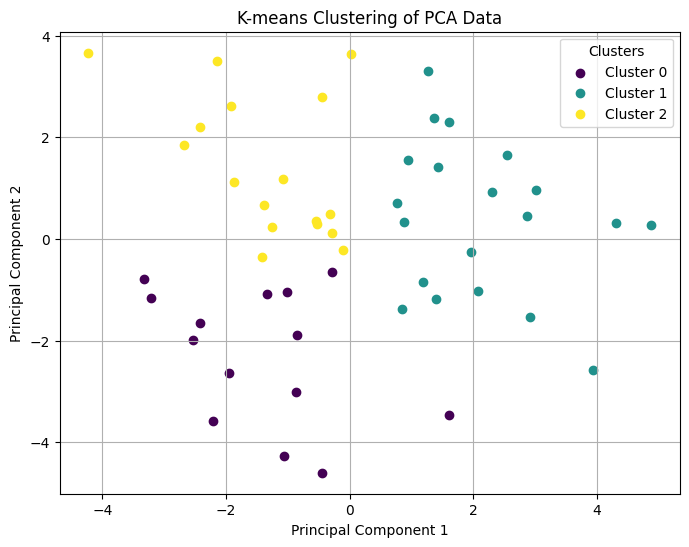

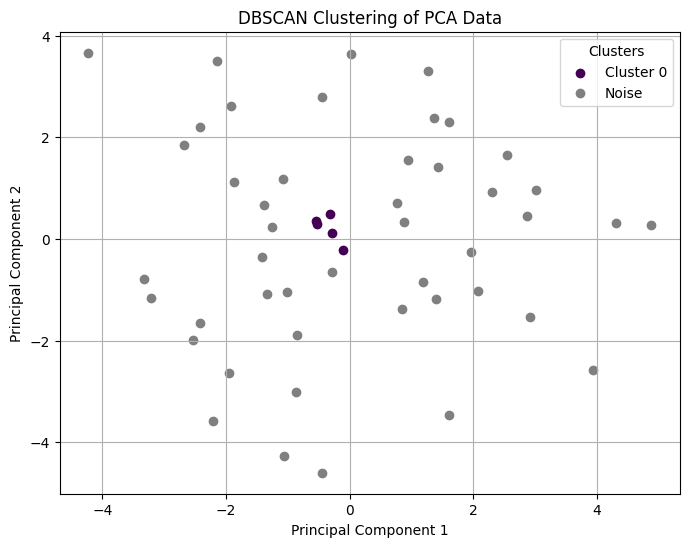

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.cm as cm

# สมมุติให้ X_pca เป็นข้อมูลที่ได้จาก PCA (แทนที่ด้วยข้อมูลจริงของคุณ)
# X_pca = ...

# Perform K-means clustering
n_clusters = 3  # จำนวนกลุ่มที่ต้องการ
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_pca)
labels_kmeans = kmeans.labels_

# Visualize the K-means clusters
plt.figure(figsize=(8, 6))
colors = cm.viridis(np.linspace(0, 1, n_clusters))  # ใช้ colormap viridis
for i in range(n_clusters):
    plt.scatter(X_pca[labels_kmeans == i, 0], X_pca[labels_kmeans == i, 1], color=colors[i], label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of PCA Data')
plt.legend(title='Clusters')
plt.grid()
plt.show()

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # ปรับค่า eps และ min_samples ตามต้องการ
dbscan.fit(X_pca)
labels_dbscan = dbscan.labels_

# Visualize the DBSCAN clusters
plt.figure(figsize=(8, 6))
unique_labels = set(labels_dbscan)
colors_dbscan = cm.viridis(np.linspace(0, 1, len(unique_labels) - 1))
for i, label in enumerate(unique_labels):
    if label == -1:
        # สำหรับ noise points
        plt.scatter(X_pca[labels_dbscan == label, 0], X_pca[labels_dbscan == label, 1], color='gray', label='Noise')
    else:
        plt.scatter(X_pca[labels_dbscan == label, 0], X_pca[labels_dbscan == label, 1], color=colors_dbscan[i % len(colors_dbscan)], label=f'Cluster {label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering of PCA Data')
plt.legend(title='Clusters')
plt.grid()
plt.show()


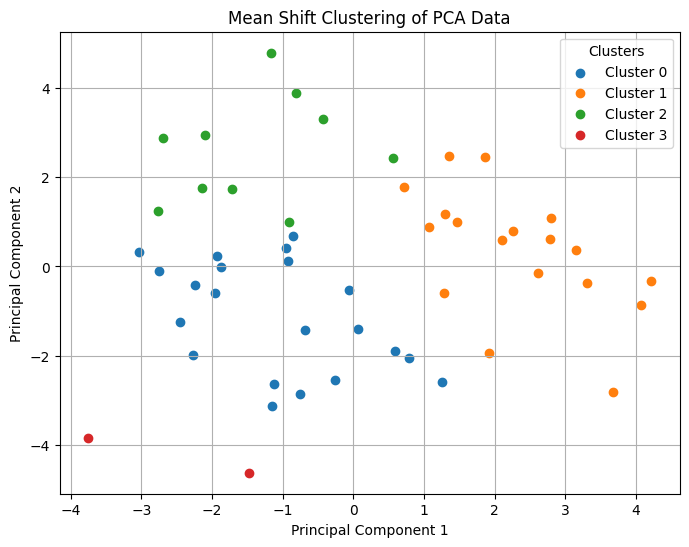

In [172]:
from sklearn.cluster import MeanShift

# 1. ลดมิติด้วย PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 2. ใช้ Mean Shift เพื่อจัดกลุ่มข้อมูล
mean_shift = MeanShift(bandwidth=2)  # ปรับ bandwidth ตามต้องการ
labels_mean_shift = mean_shift.fit_predict(X_pca)

# 3. แสดงผลการจัดกลุ่ม
plt.figure(figsize=(8, 6))
unique_labels = set(labels_mean_shift)
for label in unique_labels:
    plt.scatter(X_pca[labels_mean_shift == label, 0], X_pca[labels_mean_shift == label, 1], label=f'Cluster {label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Mean Shift Clustering of PCA Data')
plt.legend(title='Clusters')
plt.grid()
plt.show()


จากกราฟ K-means Clustering of PCA Data
เรากำหนดให้ มีทั้งหมด 3 กลุ่ม (กำหนดเอง)
*   Clusters0 = สีม่วง
*   Clusters1 = สีฟ้าอมเขียว
*   Clusters2 = สีเหลือง

จากกราฟ DBSCAN Clustering of PCA Data แบ่งได้ทั้งหมด 2 กลุ่ม
*   Clusters0 = สีม่วง
*   Noise(มีค่า=-1) = สีเทา

และจากกราฟ Mean Shift Clustering of PCA Data แบ่งได้ทั้งหมด 4 กลุ่ม
*   Clusters0 = สีน้ำเงิน
*   Clusters1 = สีส้ม
*   Clusters2 = สีเขียว
*   Clusters3 = สีแดง
ซ

## **4.สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน**

In [179]:
# สร้าง DataFrame จากข้อมูล PCA
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# เพิ่มคอลัมน์สำหรับ labels จาก K-means
df_pca['KMeans_Cluster'] = labels_kmeans

# เพิ่มคอลัมน์สำหรับ labels จาก DBSCAN
df_pca['DBSCAN_Cluster'] = labels_dbscan

# เพิ่มคอลัมน์สำหรับ labels จาก Mean Shift
df_pca['MeanShift_Cluster'] = labels_mean_shift

# Create a DataFrame with point information and cluster assignments
df_kmeans = pd.DataFrame({'Point': range(1, 52), 'Cluster_KMeans': labels_kmeans})
df_dbscan = pd.DataFrame({'Point': range(1, 52), 'Cluster_DBSCAN': labels_dbscan})
df_meanshift = pd.DataFrame({'Point': range(1, 52), 'Cluster_MeanShift': labels_mean_shift})

# Merge the DataFrames for a combined table
df_clusters = pd.merge(df_kmeans, df_dbscan, on='Point')
df_clusters = pd.merge(df_clusters, df_meanshift, on='Point')

Cluster_DBSCAN= []
for i in df_clusters['Cluster_DBSCAN']:
  if i == -1:
    Cluster_DBSCAN.append('Noise')
  else:
    Cluster_DBSCAN.append(i)
df_clusters['Cluster_DBSCAN'] = Cluster_DBSCAN

# Display the table
print("Cluster Assignments for 51 Points")
df_clusters


Cluster Assignments for 51 Points


,Point,Cluster_KMeans,Cluster_DBSCAN,Cluster_MeanShift
0,1,0,Noise,3
1,2,0,Noise,0
2,3,1,Noise,1
3,4,1,Noise,1
4,5,1,Noise,1
5,6,0,Noise,2
6,7,1,Noise,1
7,8,0,Noise,0
8,9,1,Noise,1
9,10,0,Noise,0
